# MSc in AI - CE6002 & CS5062 
### Etivity 2 - Data preparation & Can we learn?
Student Name: Michel Danjou

Student ID: 18263461


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle


# Task 1 (CS5062)

*Fill-in the missing values in the bank dataset. Use the EDA techniques from E-tivity 1 to decide how to fill in missing values. In your notebook, explain shortly (max 250 words) the decisions you have taken.*

## Load the dataset

In [2]:
# Load the data
data = pd.read_csv("bank_et2.csv") 

In [3]:
data.head()

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


Column[0] is an index with no other purpose than to count the number of samples. It has no impact when it comes to predicting the target function so we can remove it.

In [4]:
# Drop column 0
data = data.drop(data.columns[0], axis=1)

## Indentify the missing values

In [5]:
data.apply(lambda x: sum(x.isnull()), axis=0)

age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

The colums with missing value are:
  * age              **12**
  * job              **10**
  * education       **104**
  * contact         **191**
  * poutcome        **454**
  
Lets print the rows where at least one of these column as a missing value

In [6]:
null_columns=data.columns[data.isnull().any()]
columns = ['age', 'job', 'education', 'contact', 'poutcome']
for col in columns:
    print("\n{}:".format(col))
    print(data[data[col].isnull()][null_columns])
    


age:
      age            job  education    contact poutcome
456   NaN  self-employed   tertiary   cellular  failure
472   NaN    blue-collar    primary  telephone  failure
526   NaN       services  secondary   cellular  failure
595   NaN     management   tertiary   cellular  failure
597   NaN  self-employed  secondary   cellular  failure
601   NaN         admin.  secondary   cellular  failure
605   NaN     management   tertiary   cellular  failure
744   NaN     management   tertiary   cellular  failure
795   NaN     technician   tertiary   cellular  success
1171  NaN        retired   tertiary   cellular  success
1232  NaN        student  secondary   cellular  success
1408  NaN  self-employed   tertiary   cellular      NaN

job:
       age  job  education    contact poutcome
255   42.0  NaN    primary   cellular  failure
257   46.0  NaN        NaN   cellular  failure
831   41.0  NaN    primary        NaN      NaN
1223  55.0  NaN  secondary   cellular  success
1281  50.0  NaN        Na

## age

Let's start by printing the samples where `age` is missing since there are only 12 of them.

In [7]:
data[data['age'].isna()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
456,NaN,self-employed,married,tertiary,no,917,0.311161,-0.818688,no,no,cellular,6,feb,518,3,212,5,failure,no
472,NaN,blue-collar,married,primary,no,474,0.729179,0.350980,yes,yes,telephone,9,feb,152,3,221,1,failure,no
526,NaN,services,married,secondary,no,2478,0.469463,0.180632,yes,no,cellular,28,jan,347,1,230,1,failure,no
595,NaN,management,married,tertiary,no,1857,-0.137751,0.524516,no,no,cellular,29,jan,386,1,168,4,failure,no
597,NaN,self-employed,married,secondary,yes,254,0.800582,0.370658,yes,yes,cellular,29,jan,194,1,188,1,failure,no
601,NaN,admin.,single,secondary,no,111,0.269082,0.060002,yes,no,cellular,29,jan,55,1,195,3,failure,no
605,NaN,management,married,tertiary,no,1330,1.007376,-0.459770,yes,no,cellular,29,jan,41,2,261,1,failure,no
744,NaN,management,married,tertiary,no,-61,0.638129,-1.001420,no,no,cellular,30,jan,90,5,172,1,failure,no
795,NaN,technician,single,tertiary,no,992,0.901646,-0.098458,yes,no,cellular,4,may,301,1,88,2,success,no
1171,NaN,retired,married,tertiary,no,2812,-0.336489,2.210606,no,no,cellular,3,aug,392,4,181,3,success,yes


We need to keep track of the indices where `age` is null as we will use them later on to verify if all the ages are correctly replaced.

In [8]:
null_ages = data[data['age'].isna()]
print("null_ages:", null_ages.index)

null_ages: Int64Index([456, 472, 526, 595, 597, 601, 605, 744, 795, 1171, 1232, 1408], dtype='int64')


We could backfill the missing `age` fields using the mean age value we calculated to be 41 in Etivity 1. However this would certainly be unrealistic for 2 samples:
  * sample 1171, which represents a retiree 
  * sample 1232, which represents a student
  
A better way is to generate a pivot table but first lets start by studying the value of `age` in relation to other data to determine which attributes to use in our pivot.

### Identify which features are best suited to define the `age`

Here we simply iterate over a few combinations of interesting features with a view  to find the ones that best define the age.
Amongst the features that I have short-listed are:
  * `job`,`housing`
  * `job`,`loan`
  * `job`,`subscribed`
  * `job`,`marital`

<Figure size 1080x1440 with 0 Axes>

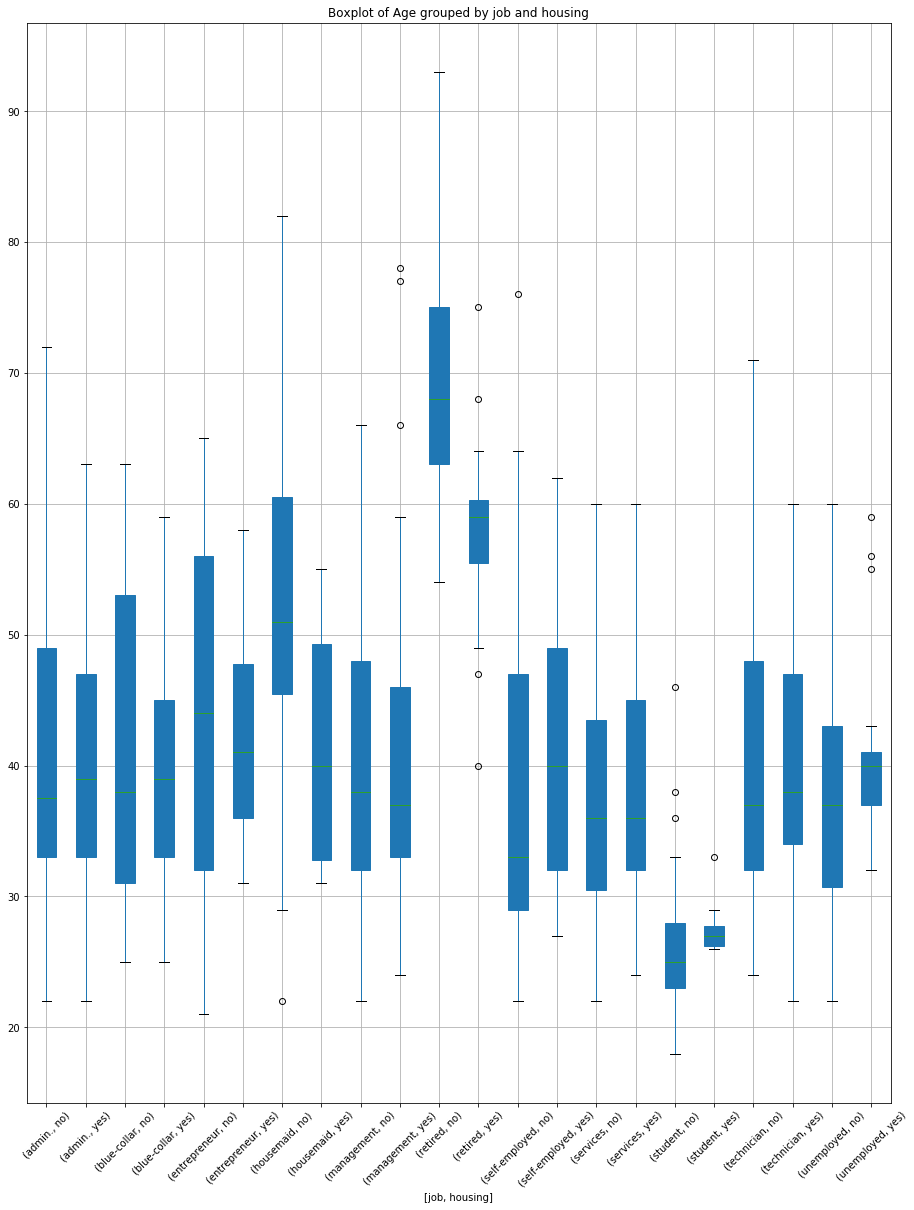

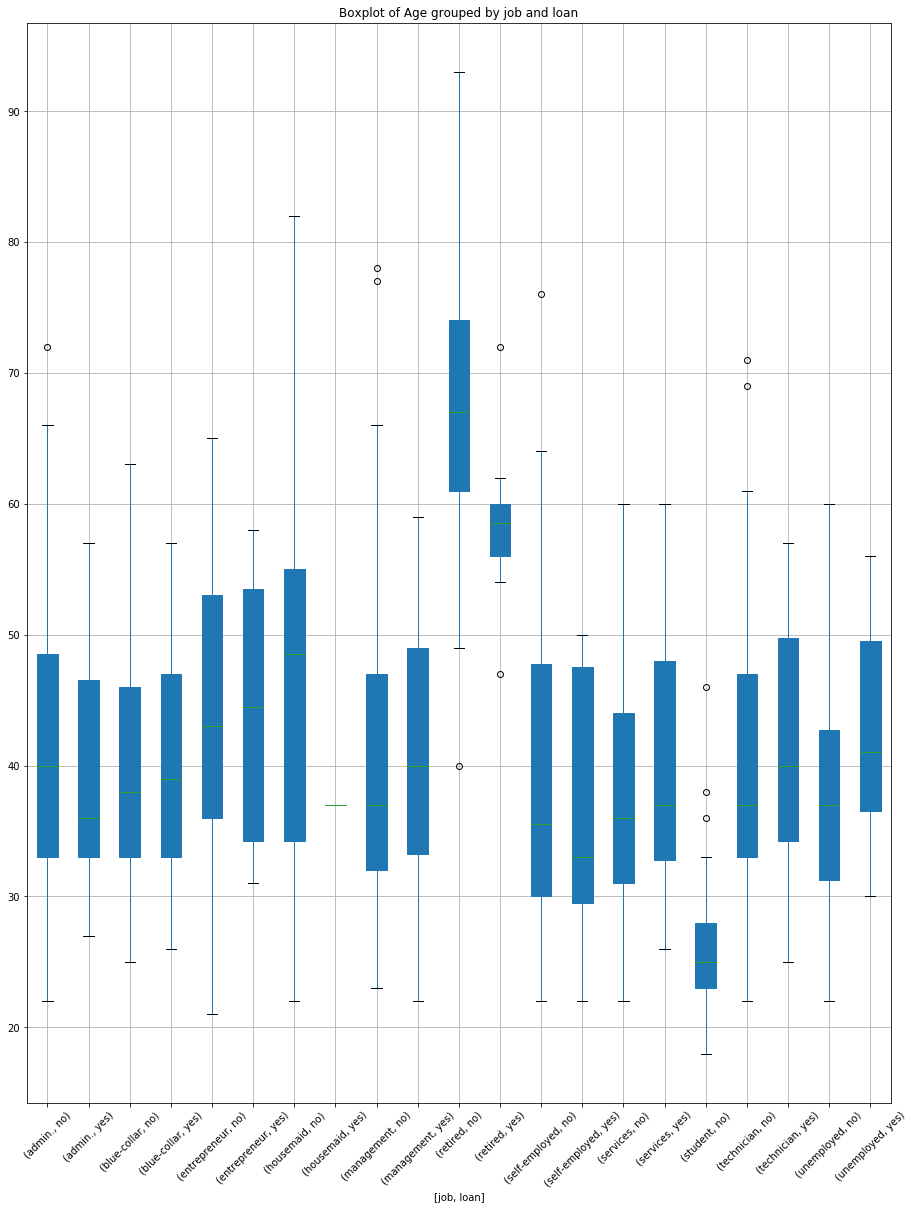

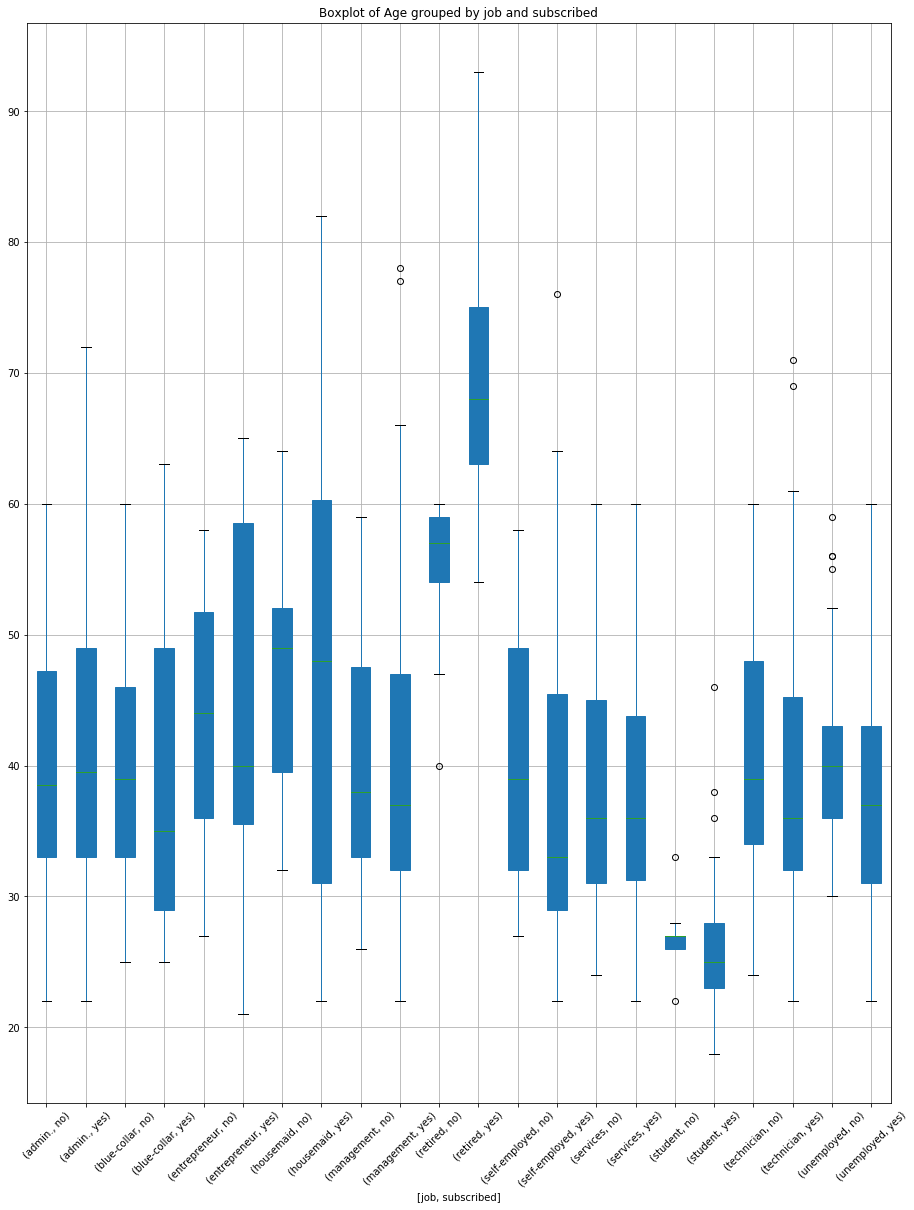

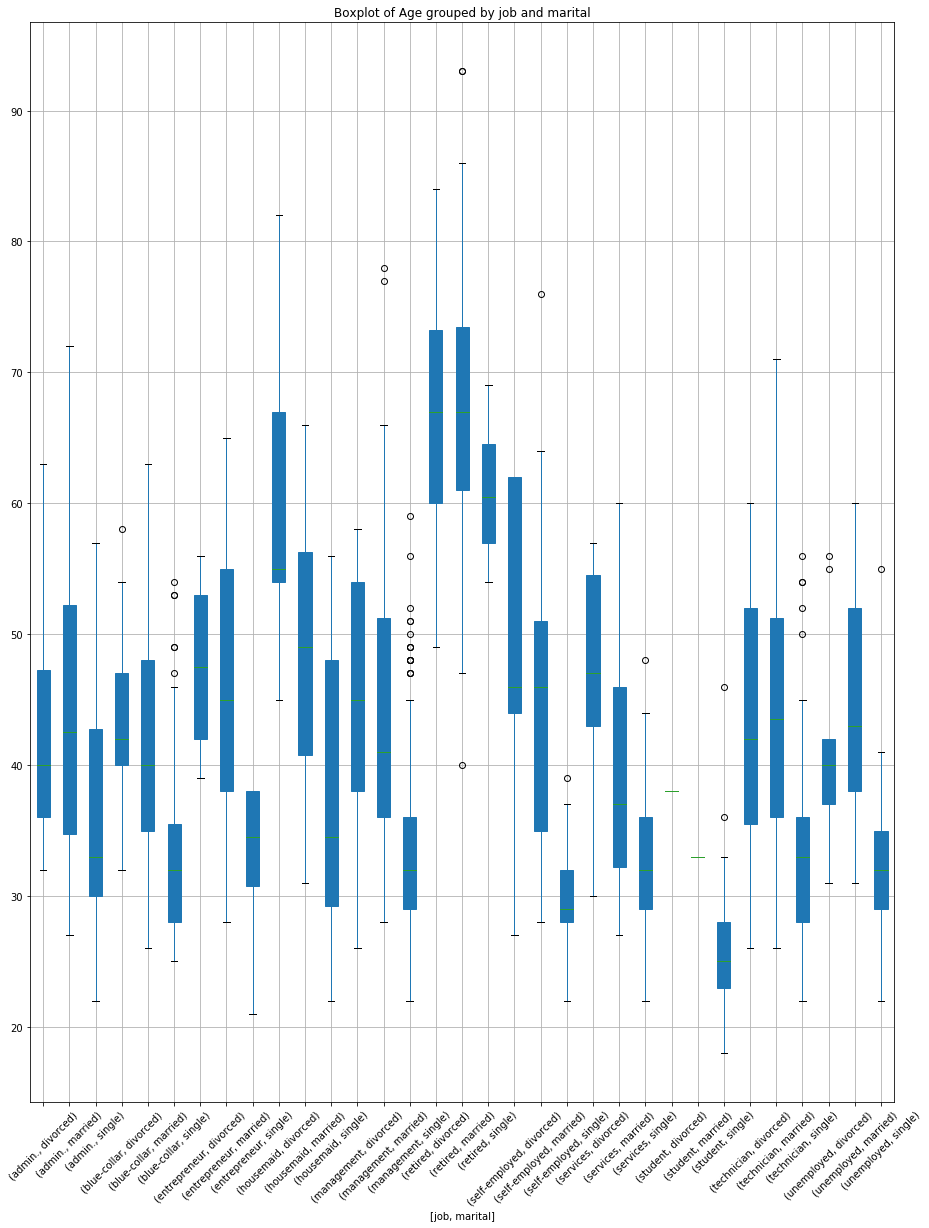

In [9]:
col_names = [['job','housing'], ['job','loan'], ['job','subscribed'], ['job','marital']]

fig = plt.figure(figsize=(15,20))
for counter, cols in enumerate(col_names):
    title = "Boxplot of Age grouped by " + col_names[counter][0] + " and " + col_names[counter][1]
    counter +=1
    data.boxplot(column='age', by=cols, figsize=(15,20), patch_artist = True, rot=45)
    plt.title(title)
    plt.suptitle("")

The above plots show the age mean values grouped by [`job`,`housing`], [`job`,`loan`], [`job`,`subscribed`] and [`job`,`marital`].

However, the boxplot of `age` by `job` and `marital` is clearly more streched vertically indicating that there is more variance in the calculated age mean value and therefore these features are the most appropriate for infering the missing age values.


### Replacing the age null values

We will now create a **pivot table summarizing the mean age values** for any given combination of `job` and `marital`, and use these to fill in the samples where `age` is missing.


In [10]:
table = data.pivot_table(values='age', 
                       index='job', 
                       columns='marital', 
                       aggfunc=np.median)
print(table)

marital        divorced  married  single
job                                     
admin.             40.0     42.5    33.0
blue-collar        42.0     40.0    32.0
entrepreneur       47.5     45.0    34.5
housemaid          55.0     49.0    34.5
management         45.0     41.0    32.0
retired            67.0     67.0    60.5
self-employed      46.0     46.0    29.0
services           47.0     37.0    32.0
student            38.0     33.0    25.0
technician         42.0     43.5    33.0
unemployed         40.0     43.0    32.0


In [11]:
# Define function to return an element of the pivot table
def get_element(x):
    return table.loc[x['job'], x['marital']]

# Replace missing values
data['age'].fillna(data[data['age'].isnull()].apply(get_element, axis=1), inplace=True)

### Sanity checks

We can see below that all the samples have been updated with the values from the pivot table.

In [12]:
def print_rows(row_indices, col_names):
    print(data.loc[data.index.isin(row_indices.index), col_names])

print_rows(null_ages, ['age','job','marital'])    

       age            job  marital
456   46.0  self-employed  married
472   40.0    blue-collar  married
526   37.0       services  married
595   41.0     management  married
597   46.0  self-employed  married
601   33.0         admin.   single
605   41.0     management  married
744   41.0     management  married
795   33.0     technician   single
1171  67.0        retired  married
1232  25.0        student   single
1408  29.0  self-employed   single


Let's make sure that absolutely all the samples now have an age.

In [13]:
data['age'].isna().sum()

0

We can take a look at the distribution of the age in the data set and notice that is matches what we had in Etivity 1, which is a sign that our operation did no impact the overall data distribution.

In [14]:
data['age'].describe()

count    2000.000000
mean       41.742000
std        12.711657
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

## Job

We remember from earlier that there are only 10 samples where `job` is null. We start by listing these samples to see if we can spot something obvious.

In [15]:
data[data['job'].isna()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
255,42.0,NaN,single,primary,no,2398,-1.418888,1.809977,yes,no,cellular,3,feb,144,2,271,2,failure,no
257,46.0,NaN,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
831,41.0,NaN,single,primary,no,2398,-0.243804,-0.685437,yes,no,NaN,8,may,287,2,-1,0,NaN,no
1223,55.0,NaN,married,secondary,no,2206,-1.134511,0.861389,no,no,cellular,12,aug,265,1,91,5,success,yes
1281,50.0,NaN,married,NaN,no,558,-0.455001,1.595412,no,no,cellular,9,jul,464,1,683,6,failure,yes
1669,54.0,NaN,married,secondary,no,2206,-0.575645,-0.242814,no,no,cellular,13,may,260,1,91,4,success,yes
1711,77.0,NaN,married,NaN,no,397,-0.871514,0.134782,no,no,telephone,7,may,300,3,-1,0,NaN,yes
1801,28.0,NaN,single,NaN,no,326,0.298961,1.653248,no,no,cellular,11,oct,450,1,231,1,success,yes
1868,48.0,NaN,single,NaN,no,1819,0.680564,-0.786048,no,no,cellular,2,sep,1440,1,458,1,failure,yes
1975,45.0,NaN,married,tertiary,no,406,-2.211965,2.109631,no,no,cellular,7,sep,314,1,-1,0,NaN,yes


We notice that the `age` distribution for the samples with no `job` is spread between 28 and 77 years old.
This age range might cover working age people as well as retirees. As a result we can't simply use the mean of the `job` category.

We notice that all the samples in the above table have an `age` entry. We can use this information to generate a function that will return the most common job for a given age and use it to fill the missing jobs.

### Generate the most common job for a given age

We need a helper function that will return the most common job for a given age. Later on we will use this function when **iterating over the dataframe** to replace the missing `job` cells.

In [16]:
def get_job_for_age(age):
    return data['job'][data['age']==age].mode()[0]

Test that the `get_job_for_age()` function works as expected.

In [17]:
print("Mode job for people aged 70:",get_job_for_age(77))
print("Mode job for people aged 30:",get_job_for_age(28))
print("Mode job for people aged 18:",get_job_for_age(18))

Mode job for people aged 70: retired
Mode job for people aged 30: management
Mode job for people aged 18: student


### Filling in the job using the most common job with the given age.

Before we start we need to keep track of the indices for which `job` is null. We will need them later on for our sanity checks.

In [18]:
null_jobs = data[data['job'].isna()]
print("null_jobs:", null_jobs.index)

null_jobs: Int64Index([255, 257, 831, 1223, 1281, 1669, 1711, 1801, 1868, 1975], dtype='int64')


In [19]:
# The code below doesn't work because data['age'] returns the entire column, not just the one we are iterating over.
# I would love to know how to fix this, but in the mean time I use the old fashion iterator.
#
#data['job'] = data.job.apply(lambda x: x if not pd.isnull(x) else get_job_for_age(data['age']))
#data['job'] = data.job.apply(lambda x: x if not pd.isnull(x) else get_job_for_age(data.age))

#for index, row in data.iterrows():
#    if(pd.isnull(row['job'])):
#        filler = get_job_for_age(row['age'])
#        data.at[index,'job'] = filler

def replace_null_cells(data, column_with_nulls, compute_function, compute_reference_column):
    for index, row in data.iterrows():
        if(pd.isnull(row[column_with_nulls])):
            filler = compute_function(row[compute_reference_column])
            data.at[index,column_with_nulls] = filler

replace_null_cells(data, 'job', get_job_for_age, 'age')
    

### Sanity checks

Lets verify that the samples were updaded as expected

In [20]:
print(data.loc[data.index.isin(null_jobs.index),['age','job']])

       age          job
255   42.0   management
257   46.0  blue-collar
831   41.0   management
1223  55.0   technician
1281  50.0   management
1669  54.0   management
1711  77.0      retired
1801  28.0   management
1868  48.0  blue-collar
1975  45.0   technician


Now check that absolutely all the jobs are filled in.

In [21]:
data[data['job'].isna()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


## Education

In [22]:
data[data['education'].isna()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
10,38.0,management,single,NaN,no,715,1.079459,-1.642914,yes,no,cellular,2,apr,951,1,132,3,failure,no
15,38.0,blue-collar,married,NaN,no,0,0.606796,0.583824,yes,no,cellular,2,apr,477,2,267,1,failure,no
124,39.0,blue-collar,married,NaN,no,0,0.193043,-0.140199,no,no,cellular,2,feb,731,1,193,3,failure,no
209,37.0,management,married,NaN,no,247,-0.636695,-0.828058,no,no,cellular,2,feb,192,2,208,1,failure,no
257,46.0,blue-collar,married,NaN,no,677,-0.399374,0.150261,no,no,cellular,3,feb,425,1,82,1,failure,no
262,31.0,blue-collar,married,NaN,no,-120,0.865080,0.071962,yes,no,cellular,3,feb,100,3,201,2,failure,no
285,51.0,technician,divorced,NaN,no,1328,0.078528,-1.931680,yes,no,cellular,4,feb,119,1,251,1,failure,no
324,41.0,blue-collar,married,NaN,no,402,-0.358492,0.388384,yes,no,cellular,4,feb,604,1,204,2,failure,no
348,56.0,admin.,married,NaN,no,1848,1.265816,-0.039394,yes,no,cellular,4,feb,147,2,260,1,failure,no
381,43.0,management,married,NaN,no,587,1.053251,0.993957,yes,no,cellular,5,feb,11,6,231,9,failure,no


Here we try to identify which features are good predictors for the education

In [23]:

print(data[data["education"].isnull() & (data["job"].isnull() | data["marital"].isnull() | data["age"].isnull() | data["default"].isnull() | data["housing"].isnull() | data["loan"].isnull()  )][['education', 'job', 'age', 'marital', 'default']])

Empty DataFrame
Columns: [education, job, age, marital, default]
Index: []


The above cells tells us that `education`, `job`, `age`, `marital`, `default`, `housing`, `loan` are never null when `education` is null. All are candidates for estimating the probable value of `education`

### Pivot of Education by job and marital

Let's build a pivot table that will tell us, the average `education` by `job` and `marital` status

In [24]:
education_pivot = data.pivot_table(values='education', 
                       index='job', 
                       columns='marital', 
                       aggfunc=lambda x: x.map({'primary':1, 'secondary':2, 'tertiary':3}).mean())
print(education_pivot)

marital        divorced   married    single
job                                        
admin.         2.125000  2.049587  2.174419
blue-collar    1.590909  1.623656  1.950000
entrepreneur   2.500000  2.375000  2.500000
housemaid      1.200000  1.750000  2.000000
management     2.978723  2.805195  2.907975
retired        1.657143  1.814159  2.500000
self-employed  2.600000  2.685714  2.909091
services       1.882353  1.925532  2.170213
student        3.000000  2.000000  2.142857
technician     2.250000  2.183246  2.468468
unemployed     2.111111  2.064516  2.428571


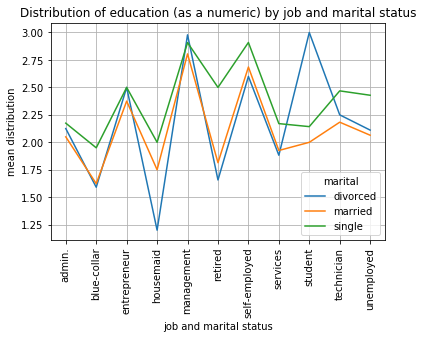

In [25]:
education_pivot.plot(rot=90)
plt.title("Distribution of education (as a numeric) by job and marital status")
plt.xlabel("job and marital status")
plt.ylabel("mean distribution")
plt.grid()
plt.gca().set_xticklabels(education_pivot.index.tolist())
plt.gca().set_xticks(range(len(education_pivot.index.tolist())))

### Fill in the missing `education` cells in the data set

We need to keep track of the indices for which `education` is null in order to facilitate sanity check later on.

In [26]:
null_education = data[data['education'].isna()]
print("null_education:", null_education.index)

null_education: Int64Index([  10,   15,  124,  209,  257,  262,  285,  324,  348,  381,
            ...
            1869, 1899, 1925, 1935, 1938, 1944, 1972, 1985, 1993, 1995],
           dtype='int64', length=104)


We also need to define a helper function to convert the numerical values stored in the pivot tables back to an `education` category

In [27]:
options = {1 : "primary",
           2 : "secondary",
           3 : "tertiary" }

def get_education_for_value(value):
    int_value = int(round(value))
    return options.get(int_value,"secondary")

We are ready to iterate over the entire data set and replace each null `education` field with the help of our pivot table.

In [28]:
for index, row in data.iterrows():
    if(pd.isnull(row['education'])):
        education_filler = get_education_for_value(education_pivot.loc[row['job']][row['marital']])
        #print("education:{}, job:{}, marital:{}, counter:{} to be filled with:{}".format(row['education'], row['job'], row['marital'], index, education_filler))
        data.at[index,'education'] = education_filler        

### Sanity checks

Lets verify that the table was updated as expected.

In [29]:
print(data.loc[data.index.isin(null_education.index),['education','job','marital']])

      education            job   marital
10     tertiary     management    single
15    secondary    blue-collar   married
124   secondary    blue-collar   married
209    tertiary     management   married
257   secondary    blue-collar   married
262   secondary    blue-collar   married
285   secondary     technician  divorced
324   secondary    blue-collar   married
348   secondary         admin.   married
381    tertiary     management   married
389   secondary     technician    single
404   secondary     technician   married
419   secondary       services    single
442   secondary    blue-collar    single
449   secondary    blue-collar   married
521   secondary     technician   married
527   secondary     technician   married
542   secondary     technician   married
547    tertiary     management   married
566   secondary     technician   married
657   secondary        retired  divorced
678   secondary     technician    single
714    tertiary  self-employed   married
718    tertiary 

In [30]:
data[data['education'].isna()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


## Contact

Lets' start by looking at the distribution of contacts in the data set.

In [31]:
data['contact'].value_counts()

cellular     1663
telephone     146
Name: contact, dtype: int64

We can see that around 83% of the contacts are of type "cellular" therefore it would be sensible to replace the missing `contact` cells with "cellular"

### Fill in the missing `contact` cells from the data set

In [32]:
data['contact'].fillna('cellular', inplace=True)

### Sanity checks

In [33]:
data[data['contact'].isna()]

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


In [34]:
print(data['contact'].value_counts())
print("\nTotal number of samples", data['contact'].value_counts().sum())

cellular     1854
telephone     146
Name: contact, dtype: int64

Total number of samples 2000


## Poutcome

In [35]:
data['poutcome'].value_counts()

failure    955
success    444
other      147
Name: poutcome, dtype: int64

In [36]:
print("Number filled-in poutcome:", data['poutcome'].value_counts().sum())
print("Number NaN poutcome      :", data['poutcome'].isnull().sum())

Number filled-in poutcome: 1546
Number NaN poutcome      : 454


In [37]:
null_poutcome = data[data['poutcome'].isna()]
print(data.loc[data.index.isin(null_poutcome.index),['poutcome','subscribed','day','month','duration','campaign','pdays','previous']])


     poutcome subscribed  day month  duration  campaign  pdays  previous
799       NaN         no    8   may       206         1     -1         0
800       NaN         no    8   may        75         1     -1         0
801       NaN         no    8   may       128         1     -1         0
802       NaN         no    8   may       216         1     -1         0
803       NaN         no    8   may       155         1     -1         0
804       NaN         no    8   may       103         3     -1         0
805       NaN         no    8   may       494         1     -1         0
806       NaN         no    8   may       107         1     -1         0
807       NaN         no    8   may       147         1     -1         0
808       NaN         no    8   may       190         1     -1         0
809       NaN         no    8   may       339         2     -1         0
810       NaN         no    8   may       198         1     -1         0
811       NaN         no    8   may       141      

### Observations
  * When `pdays` equals -1, then `poutcome` is Nan. 
  * When `poutcome` is "other" `pdays` is >0
  * Customers can be subscribed regardless of the value of `poutcome`
  
We can use `pdays` to create a new categorical value for `poutcome`. Let's call it **"not-started"**

In [38]:
data['poutcome'] = data.apply(lambda x: "not-started" if pd.isnull(x['poutcome']) & (x['pdays']==-1) else x['poutcome'], axis=1)

### Sanity checks

In [39]:
print("poutcome nb NaN        :", data['poutcome'].isnull().sum())
print("poutcome nb not-started:", len(data[data['poutcome'] == 'not-started']))

poutcome nb NaN        : 0
poutcome nb not-started: 454


# Task 2 (CS5062)

*Decide on the treatment of outliers in the bank data set. If appropriate, remove examples with extreme or unexpected attribute values, apply log transformation to numeric attributes with extreme values. Use other methods, if appropriate, to treat outliers as well. In your notebook, explain shortly (max 250 words) the decisions you have taken.*

## Numerical outliers

### Boxplots

Let's start by generating an array of boxplot showing the outliers for each numerical value in the data set.

In [40]:
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
#numeric_features.remove('Unnamed: 0')
print(numeric_features)

['age', 'balance', 'ratio_bal_ln', 'ratio_ln_inc', 'day', 'duration', 'campaign', 'pdays', 'previous']


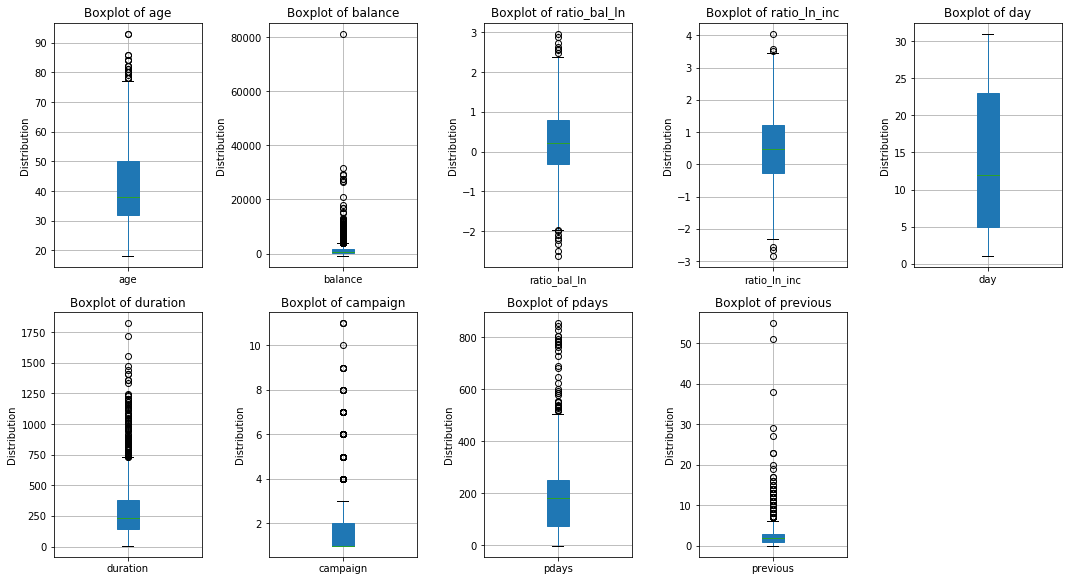

In [41]:
fig = plt.figure(figsize=(15,20))

for counter, feature in enumerate(numeric_features):
    counter +=1
    ax1 = fig.add_subplot(5, 5, counter)
    ax1.set_title("Boxplot of {}".format(feature))
    ax1.set_ylabel('Distribution')
    data.boxplot(column=feature, figsize=(5,25), patch_artist = True)
plt.tight_layout()


We can see that nearly all the numerical values have outliers as shown in the table below.

| Feature name | observations  | action |
|--------------|---------------|------|
|age           | Some outliers | These outliers are well spread out and appear to be correct. The age of a customer is an important factor to consider for a bank. We keep this information as is for now as changing it in any way would render it less readable. |
|balance       | One outlier skewing the graph. | value assumed correct. Use log function less the impact of the outliers|
|ratio_bal_ln  | Contains low positive and negative values which seems correct | Since it is used by the prediction algorithm we could **normalize** it to help with the learning. |
|ratio_ln_inc  | Contains low positive and negative values which seems correct | Since it is used by the prediction algorithm we could **normalize** it to help with the learning.|
|day           | No outliers | No action|
|duration      | Many outliers | No plan to use this feature for prediction. Ignore|
|campaign      | Outliers detected | No plan to use this feature for prediction. Ignore|
|pdays         | Outliers detected | No plan to use this feature for prediction. Ignore|
|previous      | Outliers detected | No plan to use this feature for prediction. Ignore|


### Histograms

Another approach for identifying outliers is to use histograms as shown below. Let's see how it compares to the array of boxplots we have just created.

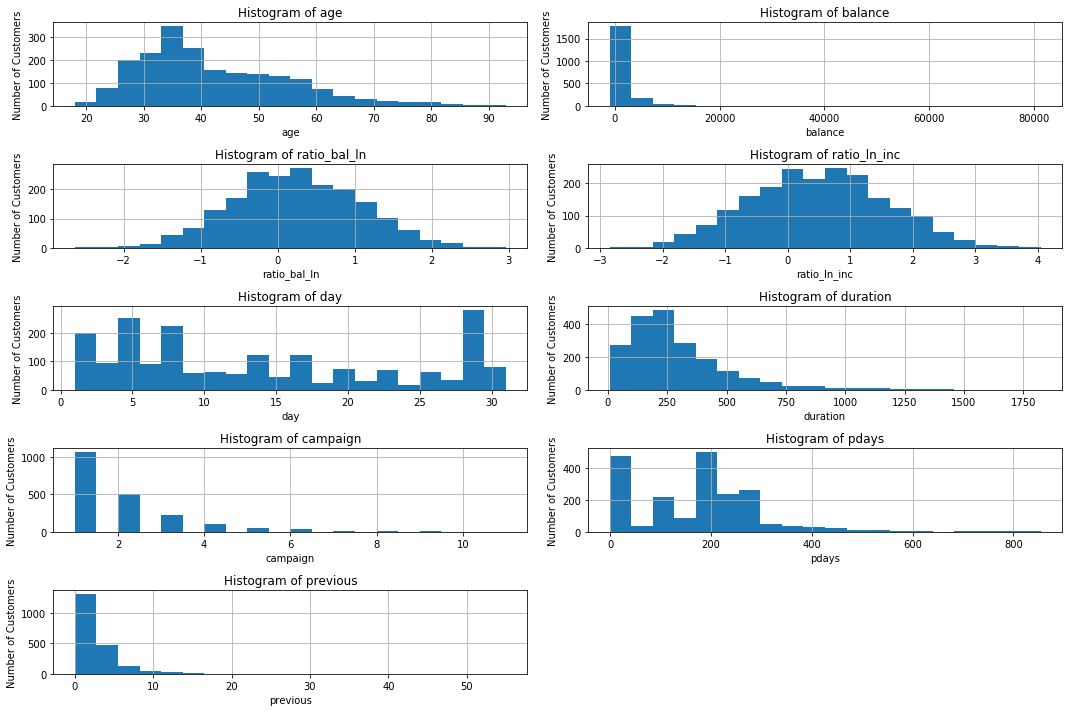

In [42]:
fig = plt.figure(figsize=(15,10))

for counter, feature in enumerate(numeric_features):
    # Plot Age
    counter +=1
    ax1 = fig.add_subplot(5, 2, counter)
    ax1.set_title("Histogram of {}".format(feature))
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Number of Customers')
    data[feature].hist(bins=20)
plt.tight_layout()

We can see from the above plot that there seem to be an outliner in the `balance` as the **x axis is streched** towards the 80000 value. There is clearly an outlier but, since this is a bank dataset, we expect the balance to be correct and we should not remove this value. Instead, to faciliate the work of any Machine Learning algorithm, we will scale the `balance` down using the **log function.**

We notice that the array of **histograms is less expressive** that the box plots when it comes to highlighting outliers. For some of the graphs, a streched X axis is the only indication that we have outliers as their **frequency is too low** to be represented as a bar. However, histograms are perfect for gauging the distribution of a feature.

### Dealing with outliers

#### Dealing with Age outliers

In [43]:
data['age'].describe()

count    2000.000000
mean       41.742000
std        12.711657
min        18.000000
25%        32.000000
50%        38.000000
75%        50.000000
max        93.000000
Name: age, dtype: float64

In [44]:
def plot_data(column, text):
    data[column].hist(bins=50)
    plt.xlabel('Customer ' + text)
    plt.ylabel('Number of Customers')
    plt.title('Number of customers by ' + text)

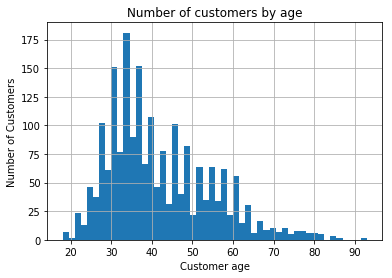

In [45]:
plot_data('age', 'age')

The age spans between 18 and 93. 
  * 18 probably is the minimum legal age to have an account in the bank.
  * 93 is the age of the oldest customer.
The outliers are expected and understood. There is no need to remove them.

Overall the age distribution is gaussian which we are expecting. We can normalize this distribtion.

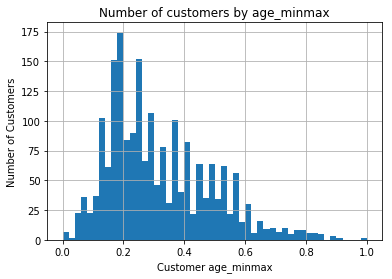

In [46]:
def apply_minmax(x, new_name):
    min_max_scaler = preprocessing.MinMaxScaler()
    np_scaled = min_max_scaler.fit_transform(x)
    data[new_name] = pd.DataFrame(np_scaled)

apply_minmax(data[['age']].values.astype(float), 'age_minmax')
plot_data('age_minmax', 'age_minmax')  

#### Dealing with Balance outliers

There is an outlier in the balance dataset that is so extreme that it is causing graph to scale badly.
To mitigate this issue we are going to apply the natural log function to the balance values but, as **Vipul and Aidan pointed out in the forum**, some of the balance values are negatives which is causing the natural log function to generate errors. One way to address this issue is to shift the data into the positive domain before applying the log function.

In [47]:
# Use a log transformation to decrease the impact of extreme values in column LoanAmount
#data['balance_log'] = np.log(data['balance'].replace(0, np.nan))

min_balance = data['balance'].min()
data['b2'] = data['balance'].replace(0, np.nan)
data['balance_log'] = np.log(data.b2.apply(lambda x: x + abs(min_balance) + 1))

In [48]:
# Replace the NaN with zeros
data['balance_log'] = data['balance_log'].replace(np.nan, 0)

# Alternative way to replace values:
# data['balance_log'].fillna(0, inplace=True)

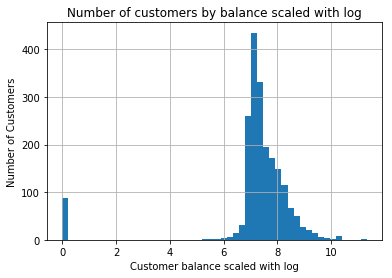

In [49]:
plot_data('balance_log', 'balance scaled with log')   

We can see that a lot of customers have a balance of zero.

#### Dealing with ratio_bal_ln outliers

<span style="color:red">TBD. Explain rationale</span>

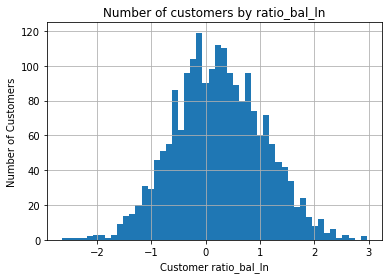

In [50]:
plot_data('ratio_bal_ln', 'ratio_bal_ln') 

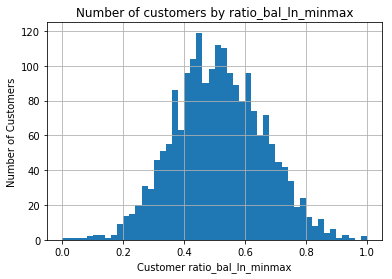

In [51]:
apply_minmax(data[['ratio_bal_ln']].values.astype(float), 'ratio_bal_ln_minmax')
plot_data('ratio_bal_ln_minmax', 'ratio_bal_ln_minmax')  

#### Dealing with ratio_ln_inc outliers

<span style="color:red">TBD. Explain rationale</span>

Text(0.5,1,'Number of customers by ratio_ln_inc')

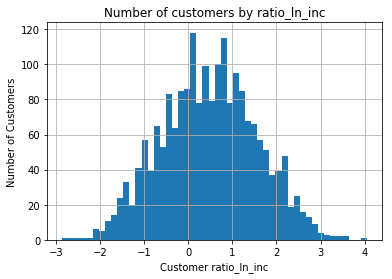

In [52]:
data['ratio_ln_inc'].hist(bins=50)
plt.xlabel('Customer ratio_ln_inc')
plt.ylabel('Number of Customers')
plt.title('Number of customers by ratio_ln_inc')

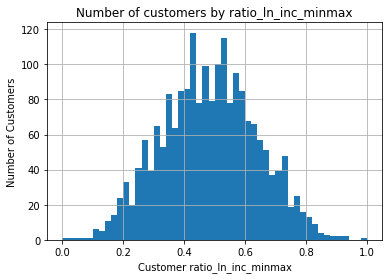

In [53]:
apply_minmax(data[['ratio_ln_inc']].values.astype(float), 'ratio_ln_inc_minmax')
plot_data('ratio_ln_inc_minmax', 'ratio_ln_inc_minmax')  

## Categorical outliers

Also I didn't find any litterature on the subject of categorical outliers, I am guessing they can happen and can be the result of a typo for example. Let's see if we can find some.

In [54]:
data.describe(exclude=[np.number])

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,11,3,3,2,2,2,2,12,4,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,466,1111,1072,1985,1037,1750,1854,404,955,1000


In [55]:
categories = data.select_dtypes(exclude=[np.number]).columns.tolist()
print(categories)
for category in categories:
    print("\n{}:".format(category))
    print(data[category].value_counts())

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

job:
management       466
technician       350
blue-collar      300
admin.           247
services         165
retired          163
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

marital:
married     1111
single       674
divorced     215
Name: marital, dtype: int64

education:
secondary    1072
tertiary      711
primary       217
Name: education, dtype: int64

default:
no     1985
yes      15
Name: default, dtype: int64

housing:
no     1037
yes     963
Name: housing, dtype: int64

loan:
no     1750
yes     250
Name: loan, dtype: int64

contact:
cellular     1854
telephone     146
Name: contact, dtype: int64

month:
feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64

poutcome:
failure        

**No outliers** were detected in the categorical features. **No action required**.

# Task 3 (CS5062)

*Suggest the creation of at least one new feature from the existing ones and justify the usefulness of your choice within the context of the 2-class classification problem you have defined in E-tivity 1.*

In [56]:
data.head()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,...,campaign,pdays,previous,poutcome,subscribed,age_minmax,b2,balance_log,ratio_bal_ln_minmax,ratio_ln_inc_minmax
0,32.0,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,...,2,131,2,failure,no,0.186667,392.0,7.224753,0.702926,0.482045
1,39.0,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,...,2,133,1,failure,no,0.280000,688.0,7.419980,0.435886,0.447707
2,59.0,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,...,2,239,1,failure,no,0.546667,1035.0,7.608871,0.709028,0.431031
3,47.0,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,...,1,238,2,failure,no,0.386667,398.0,7.229114,0.535275,0.594744
4,54.0,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,...,1,307,1,failure,no,0.480000,1004.0,7.593374,0.483397,0.335976


I would create a new feature that summarizes the **financial health** of a customer.
  * This new measure would help the bank decide if they should persue contacting a customer or not.
  * It would be based on:
    * age
    * job
    * marital
    * education
    * default
    * balance
    * ratio_bal_ln
    * ratio_ln_inc
    * housing
  * It could be calculated by converting the categorical values to numerical and running PCA. Therefore it would be a numeric value.

<span style="color:red">Not sure of the feature described below.</span>

I would create another feature that would define if a customer is ready for a "marketing campaign". It would return *yes* if the customer has not been contacted in the last 6 months, and has has a `contact` number.
  * It would be based on:
    * contact
    * month
  * It would be a 2D categorical value:
    * yes
    * no

# Task 4 (CE6002)

*Using the dataset you prepared, perform a classification on the data using scikitlearn’s logistic regression.*

*Generate plots of the approximate probability P[Ein-Eout|>e]. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).*


## Logistic regression

### Prepare the data
Steps followed to prepare the data for logistic regression:
  * Extract the features
  * Extract the target
  * Shuffle the data and split between training and testing data
  * Fit the model on the training data set


In [57]:
# extract features
feature_cols = ['ratio_bal_ln', 'ratio_ln_inc']
X = data.loc[:, feature_cols].values

# extract target
data['subscribed_code'] = data['subscribed'].map({'yes': 1, 'no': -1})
y = data.subscribed_code

# shuffle and split
X_shuffled, y_shuffled = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2)
print ("X_train.shape:{}, y_train.shape:{}".format(X_train.shape, y_train.shape))
print ("X_test.shape :{}, y_test.shape :{}".format(X_test.shape, y_test.shape))


X_train.shape:(1600, 2), y_train.shape:(1600,)
X_test.shape :(400, 2), y_test.shape :(400,)


### Fit the model
Use testing data to fit the logistic regression

In [58]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Test the model
Use training data to test the model

In [59]:
prediction = logistic_reg.predict(X_test)
#print(prediction)

predict_proba = logistic_reg.predict_proba(X_test) 
#print(predict_proba)


### Calculate Ein and Eout

<span style="color:red">Here we are calculating Ein and Eout for the Logistic Regression algorithm. **Need to clarify if this is ok** or if we should use the same technic as in Etivity 1 to evaluate them?</span>


According to the documentation: 
> score(X, y[, sample_weight]) 	
> Returns the mean accuracy on the given test data and labels.

Calling `score()` on both the training data set and testing data set should give us the **Ein** and **Eout** we are looking for plotting the VC bounds

Documentation link: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [60]:
Ein = 1 - logistic_reg.score(X_train, y_train)
print("Ein:", Ein)

Eout = 1 - logistic_reg.score(X_test, y_test)
print("Eout:", Eout)

Ein: 0.20625000000000004
Eout: 0.255


## Plot the approximate probability P[Ein-Eout|>e] with Hoeffding and VC bounds


In [61]:
# Calculate probabily of epsilon
# Lets reuse some of the code we created for Etivity 1
def calc_prob_epsilon(M, Eins, Eouts, epsilons):
    prob_epsilon=[]
    for e in epsilons:   
        counter = 0
        for i in range(M):
            if abs(Eins[i] - Eouts[i])>e:
                   counter +=1
        prob_epsilon.append(counter/M)           
    return prob_epsilon

In [62]:
epsilons = np.arange(0, 1, 0.01)
Eins = [Ein]
Eouts = [Eout]
prob_epsilon = calc_prob_epsilon(1, Eins, Eouts, epsilons)

print("epsilon proba. dist:", prob_epsilon)

epsilon proba. dist: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


<span style="color:red">How do we plot the VC dimension? I am thinking that since the Logistic Regression is two dimensional, the same VC dimension as the percepton should apply. **Is this correct???**</span>

In [63]:
# initialise some variables
epsilons = np.arange(0, 1, 0.01)
N=2000

In [64]:
# vc bound
tolerance = 0.01
dvc = 3
def get_vc_bound(N, dvc, tolerance, Ein):
    return Ein + math.sqrt((1/(2*N)) * math.log((2 * (math.pow(N,dvc) + 1)/tolerance) ))

print(get_vc_bound(N, dvc, tolerance, Ein))

0.29006680133675367


<function matplotlib.pyplot.show(*args, **kw)>

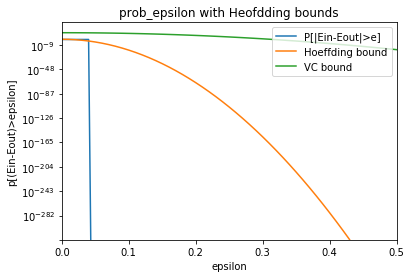

In [65]:
plt.figure()
plt.plot(epsilons, prob_epsilon, label='P[|Ein-Eout|>e]')
plt.plot(epsilons, [2*math.exp(-2*e**2*N) for e in epsilons], label='Hoeffding bound')
plt.plot(epsilons, [4*(2*math.pow(N,dvc)+1) *math.exp(-(1/8)*e**2*N) for e in epsilons], label='VC bound')

axes = plt.gca()
axes.set_xlim([0,0.5])
#axes.set_ylim([0,1])

plt.yscale('log')
plt.xlabel('epsilon')
plt.ylabel('p[(Ein-Eout)>epsilon]')
plt.title('prob_epsilon with Heofdding bounds')
plt.legend(loc='upper right')
plt.show

# Task 5 (CE6002)

*Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.*

*Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.*

**NOTES**:
important reading for plotting the learning curve:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

<span style="color:red">Work in progress.</span>

train_sizes :
 [ 106  346  586  826 1066]
train_scores:
 [[0.78301887 0.74528302 0.74528302]
 [0.80057803 0.79768786 0.79768786]
 [0.78327645 0.8105802  0.80716724]
 [0.77118644 0.7905569  0.80508475]
 [0.77767355 0.79549719 0.80018762]]
test_scores :
 [[0.81086142 0.78424015 0.77298311]
 [0.81086142 0.77110694 0.77485929]
 [0.81273408 0.78611632 0.77298311]
 [0.81460674 0.78986867 0.77298311]
 [0.8164794  0.78986867 0.77298311]]
train_sizes :
 [ 106  346  586  826 1066]
train_scores:
 [[0.79245283 0.74528302 0.74528302]
 [0.80057803 0.80346821 0.80346821]
 [0.78156997 0.81399317 0.80887372]
 [0.76876513 0.79297821 0.80508475]
 [0.77767355 0.7945591  0.8011257 ]]
test_scores :
 [[0.8071161  0.77861163 0.7673546 ]
 [0.80337079 0.7804878  0.77110694]
 [0.81273408 0.78611632 0.77673546]
 [0.81273408 0.7879925  0.77485929]
 [0.81460674 0.7879925  0.77298311]]


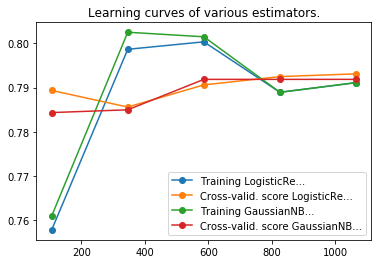

In [66]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

def plot_learning(estimator):
    cv=None
    n_jobs=None
    train_sizes=np.linspace(.1, 1.0, 5)

    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    print("train_sizes :\n", train_sizes)
    print("train_scores:\n", train_scores)
    print("test_scores :\n", test_scores)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    label_train = "Training " + str(estimator)[:10] + "..."
    label_cross_valid = "Cross-valid. score " + str(estimator)[:10] + "..."
   
    plt.plot(train_sizes, train_scores_mean, 'o-', label=label_train)
    plt.plot(train_sizes, test_scores_mean, 'o-', label=label_cross_valid)
    plt.legend(loc="best")
    plt.title("Learning curves of various estimators.")

estimators = [LogisticRegression(), GaussianNB()]

for e in estimators:
    plot_learning(e)